In [1]:
pip install yfinance pandas numpy matplotlib seaborn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 11.9 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 7.5 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 4.1 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 4.1 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 3.4 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 3.4 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 3.4 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.

In [2]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [4]:
# 1. Define the Portfolio
tickers = ['AAPL', 'MSFT', 'NVDA', 'JPM', 'V', 'AMZN', 'KO', 'PFE', 'XOM', 'TSLA']

# 2. Define Date Range
start_date = "2020-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")

print(f"⏳ Downloading data for: {tickers}...")

# 3. Download with 'auto_adjust=True'
# This puts the adjusted price into the 'Close' column automatically
raw_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# 4. Select the 'Close' column
data = raw_data['Close']

print("✅ Data Download Complete!")
data.head()

⏳ Downloading data for: ['AAPL', 'MSFT', 'NVDA', 'JPM', 'V', 'AMZN', 'KO', 'PFE', 'XOM', 'TSLA']...


[*********************100%***********************]  10 of 10 completed


✅ Data Download Complete!


Ticker,AAPL,AMZN,JPM,KO,MSFT,NVDA,PFE,TSLA,V,XOM
Date,,,,,,,,,,
2020-01-02,72.468285,94.900497,119.573334,45.745102,152.505676,5.971078,27.955412,28.684000,183.186249,53.661716
2020-01-03,71.763710,93.748497,117.995438,45.495544,150.606705,5.875504,27.805418,29.534000,181.729340,53.230309
2020-01-06,72.335564,95.143997,117.901596,45.478901,150.996033,5.900145,27.769709,30.102667,181.336349,53.639011
2020-01-07,71.995361,95.343002,115.897217,45.129517,149.619278,5.971574,27.676861,31.270666,180.857147,53.200020
2020-01-08,73.153496,94.598503,116.801346,45.212708,152.002502,5.982775,27.898266,32.809334,183.953033,52.397747


In [5]:
data

Ticker,AAPL,AMZN,JPM,KO,MSFT,NVDA,PFE,TSLA,V,XOM
Date,,,,,,,,,,
2020-01-02,72.468285,94.900497,119.573334,45.745102,152.505676,5.971078,27.955412,28.684000,183.186249,53.661716
2020-01-03,71.763710,93.748497,117.995438,45.495544,150.606705,5.875504,27.805418,29.534000,181.729340,53.230309
2020-01-06,72.335564,95.143997,117.901596,45.478901,150.996033,5.900145,27.769709,30.102667,181.336349,53.639011
2020-01-07,71.995361,95.343002,115.897217,45.129517,149.619278,5.971574,27.676861,31.270666,180.857147,53.200020
2020-01-08,73.153496,94.598503,116.801346,45.212708,152.002502,5.982775,27.898266,32.809334,183.953033,52.397747
...,...,...,...,...,...,...,...,...,...,...
2025-12-26,273.399994,232.520004,327.910004,69.870003,487.709991,190.529999,25.090000,475.190002,355.000000,119.110001
2025-12-29,273.760010,232.070007,323.750000,70.160004,487.100006,188.220001,25.000000,459.640015,354.609985,120.529999
2025-12-30,273.079987,232.529999,323.420013,70.070000,487.480011,187.539993,24.990000,454.429993,353.619995,120.989998


In [6]:
# Calculate Daily Returns (Percentage Change)
# Formula: (Today_Price - Yesterday_Price) / Yesterday_Price
returns = data.pct_change().dropna()

print("✅ Daily Returns Calculated!")
print(returns.head())

✅ Daily Returns Calculated!
Ticker          AAPL      AMZN       JPM        KO      MSFT      NVDA  \
Date                                                                     
2020-01-03 -0.009723 -0.012139 -0.013196 -0.005455 -0.012452 -0.016006   
2020-01-06  0.007969  0.014886 -0.000795 -0.000366  0.002585  0.004194   
2020-01-07 -0.004703  0.002092 -0.017000 -0.007682 -0.009118  0.012106   
2020-01-08  0.016086 -0.007809  0.007801  0.001843  0.015929  0.001876   
2020-01-09  0.021241  0.004799  0.003651  0.018215  0.012493  0.010983   

Ticker           PFE      TSLA         V       XOM  
Date                                                
2020-01-03 -0.005365  0.029633 -0.007953 -0.008039  
2020-01-06 -0.001284  0.019255 -0.002163  0.007678  
2020-01-07 -0.003343  0.038801 -0.002643 -0.008184  
2020-01-08  0.008000  0.049205  0.017118 -0.015080  
2020-01-09 -0.004352 -0.021945  0.006930  0.007656  


In [7]:
# Calculate Mean (Expected Annual Return) and Std Dev (Annual Risk)
# We multiply by 252 because there are roughly 252 trading days in a year
summary = pd.DataFrame({
    'Average Return (%)': returns.mean() * 252 * 100,      # Annualized Return in %
    'Risk (Std Dev %)': returns.std() * (252 ** 0.5) * 100 # Annualized Risk in %
})

# Sort by Risk to see which stock is the most dangerous
summary_sorted = summary.sort_values(by='Risk (Std Dev %)', ascending=False)

print("📊 Annualized Risk & Return Summary:")
summary_sorted

📊 Annualized Risk & Return Summary:


,Average Return (%),Risk (Std Dev %)
Ticker,,
TSLA,67.633884,66.559094
NVDA,71.813827,53.168718
AMZN,20.901285,35.699757
XOM,19.199744,32.806093
AAPL,27.088621,31.799390
JPM,21.643684,31.370144
MSFT,23.281517,29.552454
PFE,1.946053,27.232937
V,14.306081,27.059984


C:\Users\deven\AppData\Local\Temp\ipykernel_7676\3945485784.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=summary['Risk (Std Dev %)'][i] + 0.5,
C:\Users\deven\AppData\Local\Temp\ipykernel_7676\3945485784.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=summary['Average Return (%)'][i],


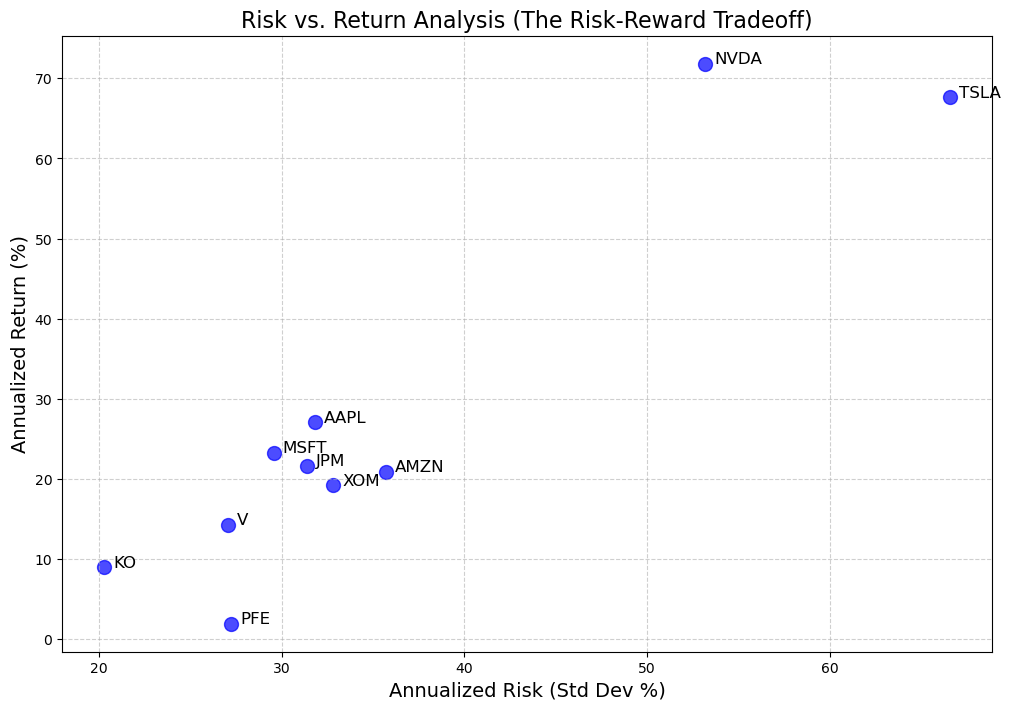

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 1. Create the Scatter Plot
# X-axis = Risk, Y-axis = Return
plt.scatter(summary['Risk (Std Dev %)'], summary['Average Return (%)'], s=100, c='blue', alpha=0.7)

# 2. Add Labels to each point so we know which stock is which
for i in range(summary.shape[0]):
    plt.text(x=summary['Risk (Std Dev %)'][i] + 0.5, 
             y=summary['Average Return (%)'][i], 
             s=summary.index[i], 
             fontdict={'size':12})

# 3. Add Titles and Grid
plt.title("Risk vs. Return Analysis (The Risk-Reward Tradeoff)", fontsize=16)
plt.xlabel("Annualized Risk (Std Dev %)", fontsize=14)
plt.ylabel("Annualized Return (%)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Show the plot
plt.show()

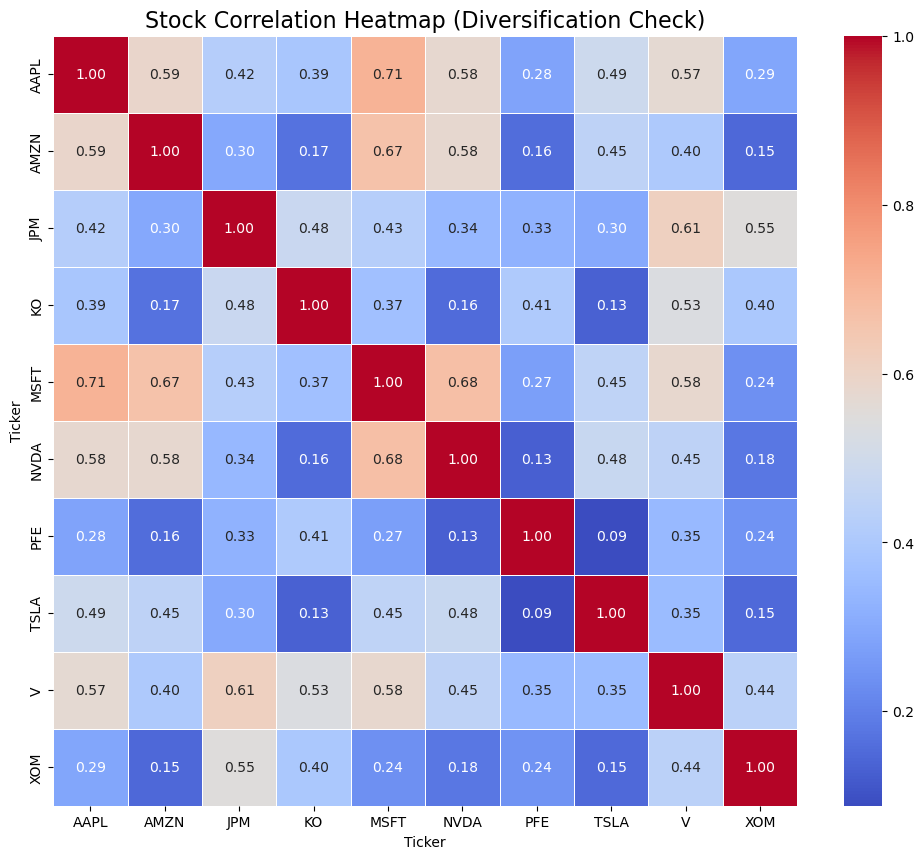

In [9]:
import seaborn as sns

# 1. Calculate Correlation (How much stocks move together)
# 1.0 = They move exactly the same
# -1.0 = They move opposite (Good for safety!)
correlation_matrix = returns.corr()

# 2. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Stock Correlation Heatmap (Diversification Check)", fontsize=16)
plt.show()

⏳ Running Monte Carlo Simulation (This might take 10-20 seconds)...


C:\Users\deven\AppData\Local\Temp\ipykernel_7676\2412051271.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = [p.sum() for p in price_series] # Summing assumes we own 1 share of each
C:\Users\deven\AppData\Local\Temp\ipykernel_7676\2412051271.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = [p.sum() for p in price_series] # Summing assumes we own 1 share of each
C:\Users\deven\AppData\Local\Temp\ipykernel_7676\2412051271.py:38: PerformanceWarning: DataFrame is highly fragmented.  This

✅ Simulation Complete!


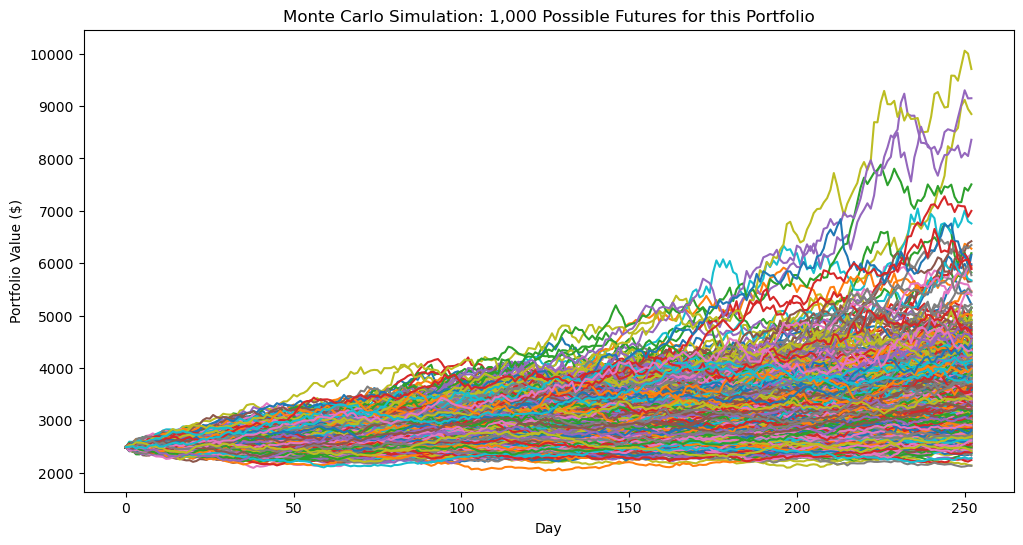

In [10]:
import numpy as np

# 1. Setup the Simulation
np.random.seed(42) # This ensures we get the same "random" numbers every time (for reproducibility)
num_simulations = 1000
time_horizon = 252 # Predict next 1 year (252 trading days)

# Get the last stock prices from our data
last_prices = data.iloc[-1]

# Create an empty table to hold all our future predictions
simulation_df = pd.DataFrame()

print("⏳ Running Monte Carlo Simulation (This might take 10-20 seconds)...")

# 2. Run the Loop 1,000 times
for x in range(num_simulations):
    
    # Generate random daily returns based on our historical Mean and Risk (Std Dev)
    # This creates a "fake" year of stock movements
    count = 0
    daily_vol = returns.std()
    daily_returns = np.random.normal(returns.mean(), daily_vol, (time_horizon, len(tickers)))
    
    # Calculate the price path
    # Price_Today = Price_Yesterday * (1 + Random_Return)
    price_series = []
    
    # Start with the last known price
    price_list = last_prices.values
    price_series.append(price_list)
    
    for y in range(time_horizon):
        price_list = price_list * (1 + daily_returns[y])
        price_series.append(price_list)
    
    # Add this specific "future" to our table
    simulation_df[x] = [p.sum() for p in price_series] # Summing assumes we own 1 share of each

print("✅ Simulation Complete!")

# 3. Visualize the Future
plt.figure(figsize=(12, 6))
plt.plot(simulation_df)
plt.title("Monte Carlo Simulation: 1,000 Possible Futures for this Portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio Value ($)")
plt.show()

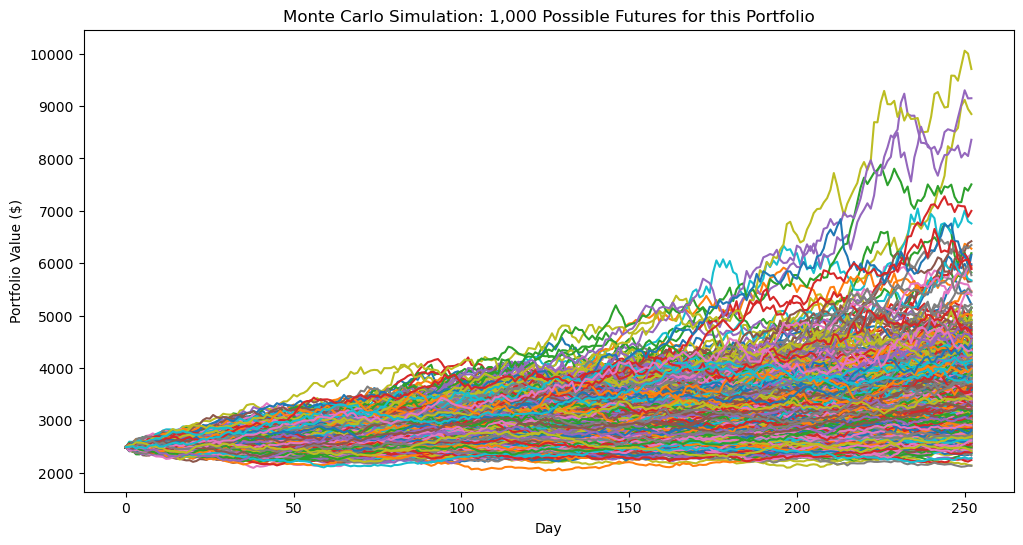

In [12]:
# 3. Visualize the Future
plt.figure(figsize=(12, 6))
plt.plot(simulation_df)
plt.title("Monte Carlo Simulation: 1,000 Possible Futures for this Portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio Value ($)")
plt.show()

💰 Initial Investment: $2486.28
📉 Worst Case Scenario (95% Confidence): Your portfolio could fall to $2604.42
⚠️ Value at Risk (VaR): You could lose up to $-118.14 in a bad market.


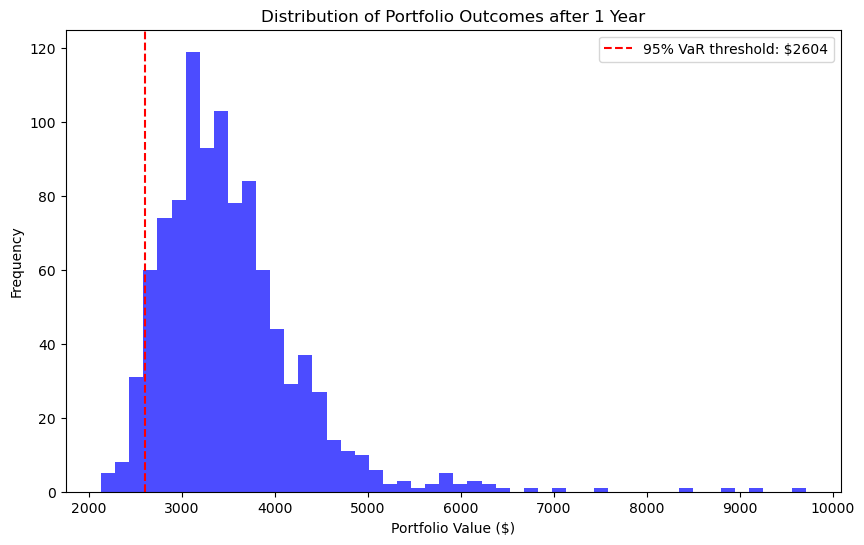

In [13]:
# 1. Get the ending value of all 1,000 simulations (Day 252)
ending_values = simulation_df.iloc[-1]

# 2. Calculate VaR at 95% Confidence Interval
# This finds the "5th worst" percentile outcome
future_value_95 = np.percentile(ending_values, 5)

# 3. Calculate the potential loss
initial_investment = simulation_df.iloc[0, 0] # Value on Day 0
VaR_95 = initial_investment - future_value_95

print(f"💰 Initial Investment: ${initial_investment:.2f}")
print(f"📉 Worst Case Scenario (95% Confidence): Your portfolio could fall to ${future_value_95:.2f}")
print(f"⚠️ Value at Risk (VaR): You could lose up to ${VaR_95:.2f} in a bad market.")

# 4. Visualize the Distribution of Final Outcomes
plt.figure(figsize=(10, 6))
plt.hist(ending_values, bins=50, alpha=0.7, color='blue')
plt.axvline(future_value_95, color='red', linestyle='--', label=f'95% VaR threshold: ${future_value_95:.0f}')
plt.title("Distribution of Portfolio Outcomes after 1 Year")
plt.xlabel("Portfolio Value ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [14]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
